In [2]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
api_key = os.getenv("NEWSAPI_KEY")

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
BTC_news = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

In [7]:
# Fetch the Ethereum news articles
ETH_news = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")

In [8]:
# Create the Bitcoin sentiment scores DataFrame

BTC_sentiment = []

for article in BTC_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        positive = sentiment["pos"]
        
        BTC_sentiment.append({
            "text": text,
            "Compound": compound,
            "Negative": negative,
            "Neutral": neutral,
            "Positive": positive
            
        })
        
    except AttributeError:
        pass
    

BTC_df = pd.DataFrame(BTC_sentiment)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
BTC_df = BTC_df[cols]

BTC_df.head()



,Compound,Negative,Neutral,Positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich..."
2,0.2732,0.051,0.867,0.081,"Two years ago, the venture firm Andreessen Hor..."
3,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc..."
4,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...


In [9]:
# Create the ethereum sentiment scores DataFrame

ETH_sentiment = []

for article in ETH_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        negative = sentiment["neg"]
        neutral = sentiment["neu"]
        positive = sentiment["pos"]
        
        ETH_sentiment.append({
            "text": text,
            "Compound": compound,
            "Negative": negative,
            "Neutral": neutral,
            "Positive": positive
            
        })
        
    except AttributeError:
        pass
    

ETH_df = pd.DataFrame(ETH_sentiment)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ETH_df = ETH_df[cols]

ETH_df.head()



,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
1,0.2732,0.051,0.867,0.081,"Two years ago, the venture firm Andreessen Hor..."
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...


In [10]:
# Describe the Bitcoin Sentiment
BTC_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.312379,0.020579,0.901158,0.078211
std,0.367924,0.038628,0.041086,0.048394
min,-0.585900,0.000000,0.812000,0.000000
25%,0.174400,0.000000,0.878000,0.063500
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.025500,0.910000,0.090000
max,0.801600,0.134000,1.000000,0.188000


In [11]:
# Describe the Ethereum Sentiment
ETH_df.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.206312,0.031765,0.880647,0.087412
std,0.372442,0.045195,0.094398,0.080910
min,-0.445700,0.000000,0.703000,0.000000
25%,0.000000,0.000000,0.845000,0.031000
50%,0.077200,0.000000,0.879000,0.067000
75%,0.571900,0.058000,0.943000,0.141000
max,0.848100,0.148000,1.000000,0.260000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum's mean positive score of 0.874 exceeded Bitcoin's mean positive score of 0.782.

Q: Which coin had the highest compound score?

A: Ethereum's max compound score of 0.848 slightly exceeded Bitcoin's max compound score of 0.802.

Q. Which coin had the highest positive score?

A: Ethereum's max positive score of 0.260 exceeded Bitcoin's max positive score of 0.188.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
#Didn't notice other stopwords that needed to be added stopwords - Taylor

In [14]:
# Complete the tokenizer function

    
def tokenizer(doc):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)  
    words = word_tokenize(re_clean)
    words = [word.lower() for word in words]
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in words if word.lower() not in sw]
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in tokens]
    return lem

    
    


In [15]:
# Create a new tokens column for bitcoin

BTC_list = []
for article in BTC_df['text']:
    BTC_output = tokenizer(article)
    BTC_list.append(BTC_output)
BTC_df['tokens'] = BTC_list
BTC_df.head(10)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, drinking, lot, youd, better, bel..."
1,0.3182,0.000,0.933,0.067,"Yesterday, the prominent bitcoin investor Mich...","[yesterday, prominent, bitcoin, investor, mich..."
2,0.2732,0.051,0.867,0.081,"Two years ago, the venture firm Andreessen Hor...","[two, year, ago, venture, firm, andreessen, ho..."
3,0.2716,0.000,0.939,0.061,"Early next week, Bitcoin is about to experienc...","[early, next, week, bitcoin, experience, third..."
4,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
5,-0.5859,0.134,0.866,0.000,Since the first Bitcoin block was generated ba...,"[since, first, bitcoin, block, generated, back..."
6,0.0772,0.058,0.877,0.066,<ul><li>The cryptocurrency market added $13 bi...,"[ullithe, cryptocurrency, market, added, billi..."
7,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
8,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
9,0.8016,0.000,0.812,0.188,The move is the latest in a string of positive...,"[move, latest, string, positive, development, ..."


In [16]:
# Create a new tokens column for ethereum
ETH_list = []
for article in ETH_df['text']:
    ETH_output = tokenizer(article)
    ETH_list.append(ETH_output)
ETH_df['tokens'] = ETH_list
ETH_df.head(10)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
1,0.2732,0.051,0.867,0.081,"Two years ago, the venture firm Andreessen Hor...","[two, year, ago, venture, firm, andreessen, ho..."
2,0.6249,0.000,0.859,0.141,Use this to send Ether from one account to ano...,"[use, send, ether, one, account, another, smar..."
3,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."
4,0.0000,0.148,0.703,0.148,With unemployment surging and businesses strug...,"[unemployment, surging, business, struggling, ..."
5,0.0000,0.000,1.000,0.000,Over the last few weeks all eyes in the crypto...,"[last, week, eye, crypto, world, glued, halven..."
6,0.5719,0.000,0.885,0.115,We have been looking for ways in which crypto ...,"[looking, way, crypto, asset, go, mainstream, ..."
7,0.2732,0.000,0.943,0.057,"Back in March, we put out our call for ideas t...","[back, march, put, call, idea, fixtheinternet,..."
8,0.0772,0.058,0.877,0.066,<ul><li>The cryptocurrency market added $13 bi...,"[ullithe, cryptocurrency, market, added, billi..."
9,0.8481,0.000,0.740,0.260,Special thanks to Kevin Owocki and Frank Chen ...,"[special, thanks, kevin, owocki, frank, chen, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2

def bigram_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    tot_bigrams = ngrams(processed, n=2)
    bigrams_grouped = dict(Counter(tot_bigrams))

    return bigrams_grouped

BTC_corpus = BTC_df['text']
BTC_bigrams = bigram_counter(BTC_corpus)
sorted(BTC_bigrams.items(), key=lambda x: x[1], reverse=True)

[(('satoshi', 'nakaboto'), 18),
 (('char', 'robot'), 9),
 (('robot', 'colleague'), 9),
 (('colleague', 'satoshi'), 9),
 (('nakaboto', 'writes'), 9),
 (('writes', 'bitcoin'), 9),
 (('every', 'fucking'), 9),
 (('fucking', 'daywelcome'), 9),
 (('daywelcome', 'another'), 9),
 (('another', 'edition'), 9),
 (('edition', 'bitcoin'), 9),
 (('bitcoin', 'today'), 9),
 (('today', 'satoshi'), 9),
 (('nakaboto', 'tell'), 9),
 (('tell', 'whats'), 9),
 (('whats', 'going'), 9),
 (('going', 'bitcoin'), 9),
 (('bitcoin', 'char'), 9),
 (('bitcoin', 'btc'), 7),
 (('btc', 'every'), 7),
 (('year', 'bitcoin'), 2),
 (('bitcoin', 'every'), 2),
 (('jk', 'rowling'), 1),
 (('rowling', 'drinking'), 1),
 (('drinking', 'lot'), 1),
 (('lot', 'youd'), 1),
 (('youd', 'better'), 1),
 (('better', 'believe'), 1),
 (('believe', 'thought'), 1),
 (('thought', 'bitcoinnotedterf'), 1),
 (('bitcoinnotedterf', 'author'), 1),
 (('author', 'cuckoo'), 1),
 (('cuckoo', 'calling'), 1),
 (('calling', 'rowlingdecided'), 1),
 (('rowling

In [33]:
# Generate the Ethereum N-grams where N=2
ETH_corpus = ETH_df['text']
ETH_bigrams = bigram_counter(ETH_corpus)
sorted(ETH_bigrams.items(), key=lambda x: x[1], reverse=True)

[(('char', 'two'), 2),
 (('open', 'source'), 2),
 (('char', 'opinion'), 2),
 (('opinion', 'expressed'), 2),
 (('expressed', 'entrepreneur'), 2),
 (('entrepreneur', 'contributor'), 2),
 (('editor', 'noteandreessen'), 1),
 (('noteandreessen', 'horowitz'), 1),
 (('horowitz', 'crypto'), 1),
 (('crypto', 'startup'), 1),
 (('startup', 'school'), 1),
 (('school', 'brought'), 1),
 (('brought', 'together'), 1),
 (('together', 'participant'), 1),
 (('participant', 'around'), 1),
 (('around', 'u'), 1),
 (('u', 'overseas'), 1),
 (('overseas', 'sevenweek'), 1),
 (('sevenweek', 'course'), 1),
 (('course', 'learn'), 1),
 (('learn', 'build'), 1),
 (('build', 'crypto'), 1),
 (('crypto', 'company'), 1),
 (('company', 'andreessen'), 1),
 (('andreessen', 'ho'), 1),
 (('ho', 'char'), 1),
 (('two', 'year'), 1),
 (('year', 'ago'), 1),
 (('ago', 'venture'), 1),
 (('venture', 'firm'), 1),
 (('firm', 'andreessen'), 1),
 (('andreessen', 'horowitz'), 1),
 (('horowitz', 'az'), 1),
 (('az', 'took'), 1),
 (('took', 

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin

BTC_top10_words = token_count(BTC_corpus)
BTC_top10_words


,word,count
0,bitcoin,36
1,char,19
2,satoshi,18
3,nakaboto,18
4,every,12
5,another,10
6,robot,9
7,colleague,9
8,writes,9
9,fucking,9


In [22]:
# Get the top 10 words for Ethereum
ETH_top10_words = token_count(ETH_corpus)
ETH_top10_words

,word,count
0,char,17
1,crypto,6
2,bitcoin,4
3,million,3
4,foundation,3
5,asset,3
6,horowitz,2
7,andreessen,2
8,two,2
9,year,2


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

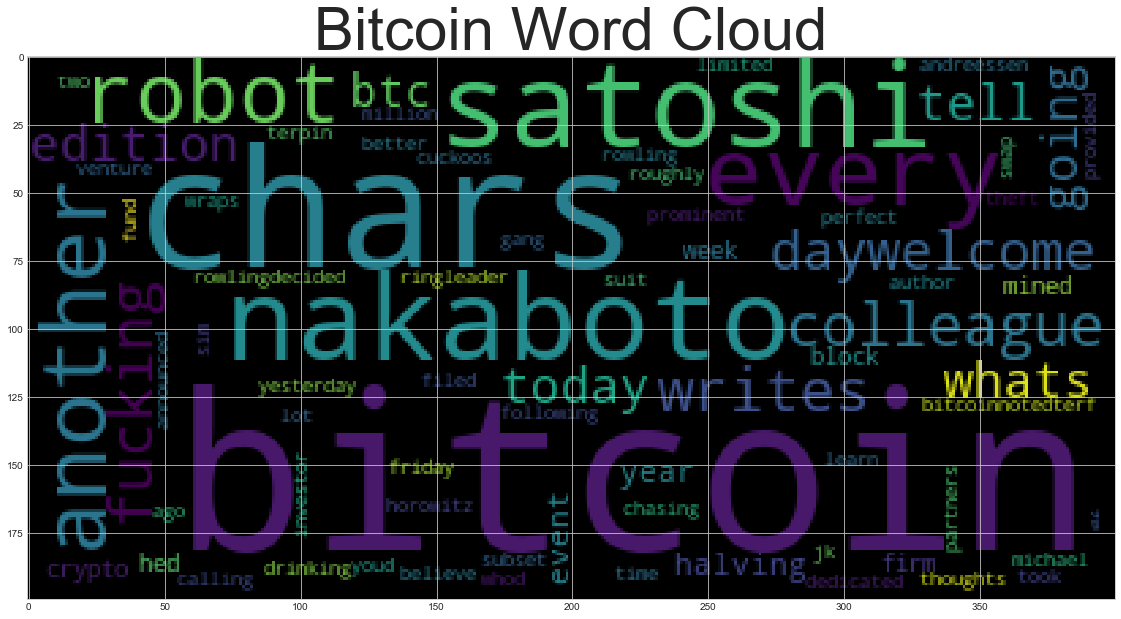

In [41]:
# Generate the Bitcoin word cloud
def process_text(doc):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)  
    words = word_tokenize(re_clean)
    words = [word.lower() for word in words]
    sw = set(stopwords.words('english'))
    output = [word.lower() for word in words if word.lower() not in sw]
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in output]
    return ' '.join(output)

BTC_string = ' '.join(BTC_corpus)
BTC_input_text = process_text(BTC_string)

wc = WordCloud(collocations=False, max_words=75).generate(BTC_input_text)
#had to add collocations code as phrases were being grouped together unnecessarily. Same issue did not repeat in Ethereum Word Cloud. Taylor
plt.title("Bitcoin Word Cloud", fontsize=60)
plt.imshow(wc)

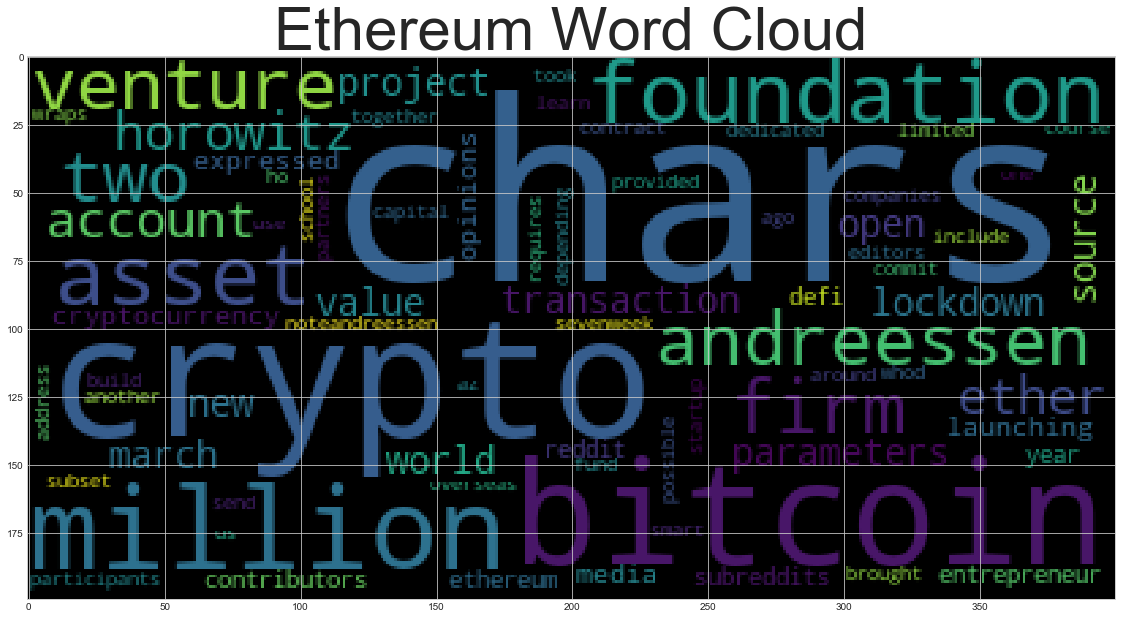

In [42]:
# Generate the Ethereum word cloud


ETH_string = ' '.join(ETH_corpus)
ETH_input_text = process_text(ETH_string)

wc = WordCloud(max_words=75).generate(ETH_input_text)
plt.title("Ethereum Word Cloud", fontsize=60)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [114]:
import spacy
from spacy import displacy

In [115]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [116]:
# Concatenate all of the bitcoin text together
BTC_concat = BTC_corpus.str.cat()


In [117]:
# Run the NER processor on all of the text

BTC_NER = nlp(BTC_concat)

# Add a title to the document


In [118]:
# Render the visualization

displacy.render(BTC_NER, style='ent')

In [132]:
# List all Entities
BTC_entities = [ent.text for ent in BTC_NER.ents if ent.label_ in ['GPE', 'PERSON', 'ORG']]
BTC_entities


['J.K. Rowling',
 'Bitcoin',
 'Michael Terpin',
 'SIM',
 'Andreessen Horowitz',
 'Bitcoin',
 'blockchain',
 'Bitcoin',
 'Bitcoin',
 'bitcoin',
 'Bitcoin',
 'Goldman Sachs',
 'bitcoin',
 'Goldman',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 '+3041',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin',
 'Bitcoin',
 'Satoshi Nakaboto',
 'Bitcoin']

---

## Ethereum NER

In [128]:
# Concatenate all of the ethereum text together
ETH_concat = ETH_corpus.str.cat()


In [129]:
# Run the NER processor on all of the text
ETH_NER = nlp(ETH_concat)

# Add a title to the document


In [130]:
# Render the visualization
displacy.render(ETH_NER, style='ent')

In [133]:
# List all Entities
ETH_entities = [ent.text for ent in ETH_NER.ents if ent.label_ in ['GPE', 'PERSON', 'ORG']]
ETH_entities


['Andreessen',
 'Crypto Startup School',
 'U.S.',
 'Andreessen Ho',
 'Andreessen Horowitz',
 'The Linux Foundation',
 'Drupal Foundation',
 'OSI',
 'Relief',
 'Ec',
 'blockchain',
 'Dapper',
 'Libra',
 'the Mozilla Builders Incubator',
 'bitcoin',
 'Bitcoin',
 'Kevin Owocki',
 'Frank Chen',
 'Gitcoin Grants',
 'Bitcoin',
 'Facebook',
 'Telegram',
 'Java',
 'Nolan Baurle',
 "the Ethereum Foundation's",
 'Hudson Jameson',
 'Lockdown Ed',
 'Ether',
 'DeFi',
 'the r/Cryptocurrency',
 'un']